In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_air = pd.read_csv('./../data/restaurant/tokyo/tokyo_air_visit.csv')
df_air.rename(columns = {'visit_date' : 'date'}, inplace = True)
df_weather = pd.read_csv('./../data/weather/worldweatheronline.com/tokyo-jp-weather_20160101-20170531.csv')

In [3]:
df_weather_evening = df_weather.loc[df_weather['hourly__time'] == 1800]
df_air_weather_merge = pd.merge(df_air, df_weather_evening, on="date")

Select a small random sample of restaurants and graph time series data related to visitor numbers to tempC.

Assumptions/key points:
 - applying Tokyo wide weather to all restaurants in the city assumes it applies homogenously.
 - taking the tempC to apply as at 6pm on any given day/date.
 
From the samples I've observed there is a varying degree of immediately observable correlation between visitor numbers and temperature. I've included a hardcoded example that does seem to demonstrate a pattern.

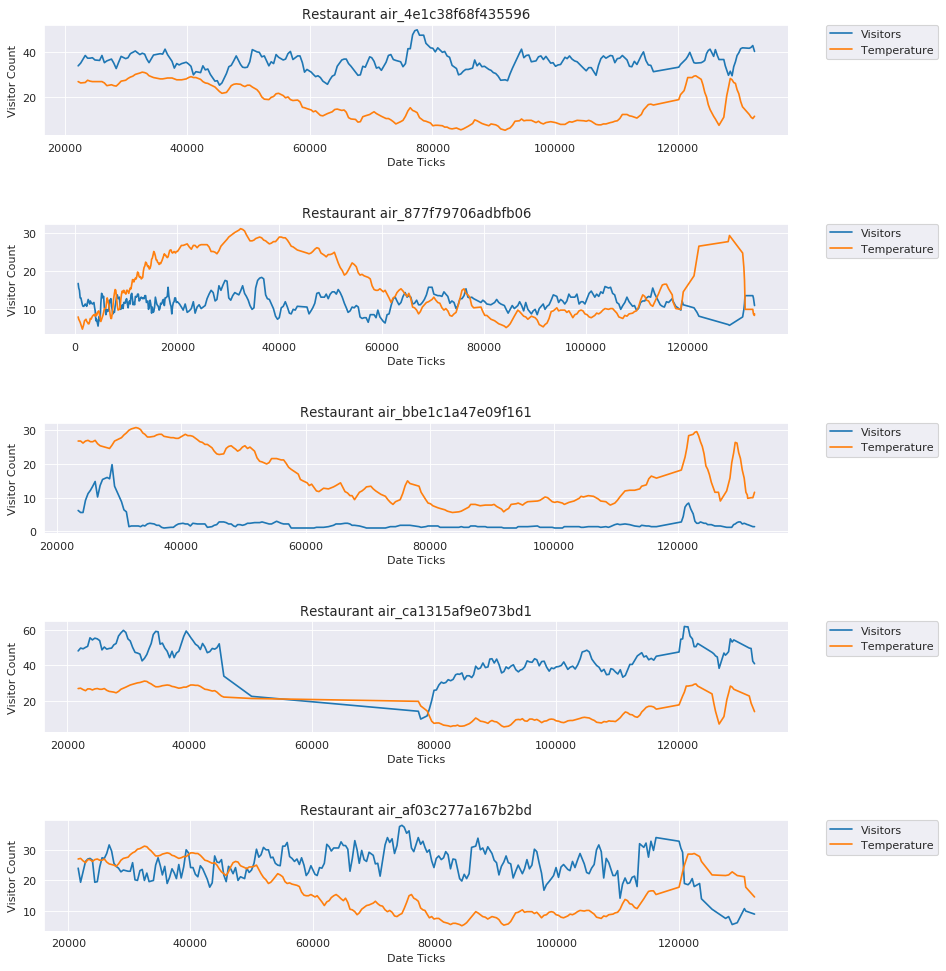

In [4]:
col=1
row=5
ind=1

sns.set_style("darkgrid")
fig1 = plt.figure(figsize=(12, 15), dpi= 80, facecolor='w', edgecolor='k')
fig1.tight_layout()

arr = df_air_weather_merge.sample(n=5).air_store_id.unique()

for val in arr:
    df_merge_subset = df_air_weather_merge.loc[df_air_weather_merge['air_store_id'] == val]
    df1 = df_merge_subset[['date','visitors','hourly__tempC']]

    df2 = df1.assign(rolling_mean_visitors=df1['visitors'].rolling(5).mean(), 
        rolling_mean_tempC=df1['hourly__tempC'].rolling(5).mean()).drop(['visitors','hourly__tempC'], axis=1)

    plt.subplot(row,col,ind)
    
    plt.title('Restaurant '+val)
    plt.xlabel('Date Ticks')
    plt.ylabel('Visitor Count')
    plot1, = plt.plot(df2['rolling_mean_visitors'])
    plot2, = plt.plot(df2['rolling_mean_tempC'])
    plt.legend([plot1, plot2], ['Visitors', 'Temperature'], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    ind = ind + 1
    
plt.subplots_adjust(hspace=0.8)
plt.show()

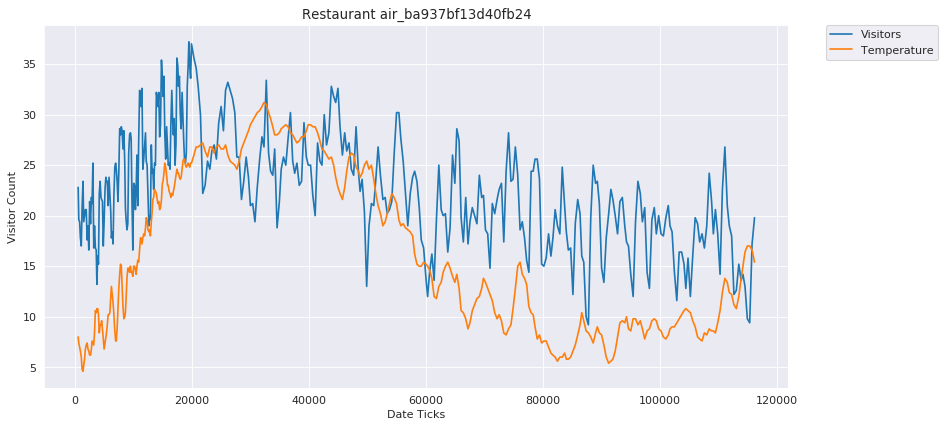

In [5]:
fig2 = plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
fig2.tight_layout()

df_merge_subset = df_air_weather_merge.loc[df_air_weather_merge['air_store_id'] == 'air_ba937bf13d40fb24']

df1 = df_merge_subset[['date','visitors','hourly__tempC']]

df2 = df1.assign(rolling_mean_visitors=df1['visitors'].rolling(5).mean(), 
    rolling_mean_tempC=df1['hourly__tempC'].rolling(5).mean()).drop(['visitors','hourly__tempC'], axis=1)

plt.subplot(1,1,1)
    
plt.title('Restaurant air_ba937bf13d40fb24')
plt.xlabel('Date Ticks')
plt.ylabel('Visitor Count')
plot1, = plt.plot(df2['rolling_mean_visitors'])
plot2, = plt.plot(df2['rolling_mean_tempC'])
plt.legend([plot1, plot2], ['Visitors', 'Temperature'], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    
plt.show()